In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools
%matplotlib inline

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving vehicles.csv to vehicles.csv


In [87]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,...,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1300,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,...,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,2450,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,...,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-7250,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1000,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,...,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,2450,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,...,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-7250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,1950,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,...,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [88]:
len(vehicles)

42253

In [89]:
len(vehicles.columns)

83

In [90]:
vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [91]:
len(pd.unique(vehicles.year))

38

In [92]:
min(pd.unique(vehicles.year))

1984

In [93]:
max(pd.unique(vehicles.year))

2021

In [94]:
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     28351
Premium Gasoline     12285
Diesel                1202
Electricity            237
Midgrade Gasoline      118
Natural Gas             60
Name: fuelType1, dtype: int64

In [95]:
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11048
Manual 5-spd                         8368
Automatic (S6)                       3186
Automatic 3-spd                      3151
Manual 6-spd                         2825
Automatic 5-spd                      2203
Automatic (S8)                       1918
Automatic 6-spd                      1682
Manual 4-spd                         1483
Automatic (variable gear ratios)      889
Automatic (S5)                        836
Automatic 7-spd                       734
Automatic 8-spd                       526
Automatic (AM-S7)                     480
Automatic 9-spd                       399
Automatic (S7)                        340
Automatic (AM7)                       267
Automatic (A1)                        236
Automatic (S4)                        233
Automatic (AV-S6)                     225
Automatic (S10)                       188
Automatic (AM6)                       160
Automatic (AV-S7)                     159
Automatic (AM-S6)                 

In [96]:
vehicles['trany2'] = vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)

A    29353
M    12889
Name: trany2, dtype: int64

In [97]:
grouped = vehicles.groupby('year')
averaged = grouped['comb08','highway08','city08'].agg([np.mean])
averaged.columns = ['comb08_mean','highway08_mean','city08_mean']
averaged['year'] = averaged.index
averaged

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,comb08_mean,highway08_mean,city08_mean,year
year,,,,
1984,19.881874,23.075356,17.982688,1984
1985,19.808348,23.042328,17.878307,1985
1986,19.550413,22.699174,17.665289,1986
1987,19.228549,22.445068,17.310345,1987
1988,19.328319,22.702655,17.333628,1988
1989,19.125759,22.465742,17.143972,1989
1990,19.000928,22.337662,17.033395,1990
1991,18.825972,22.253534,16.848940,1991
1992,18.862623,22.439786,16.805531,1992


Text(0.5, 1.0, 'All cars')

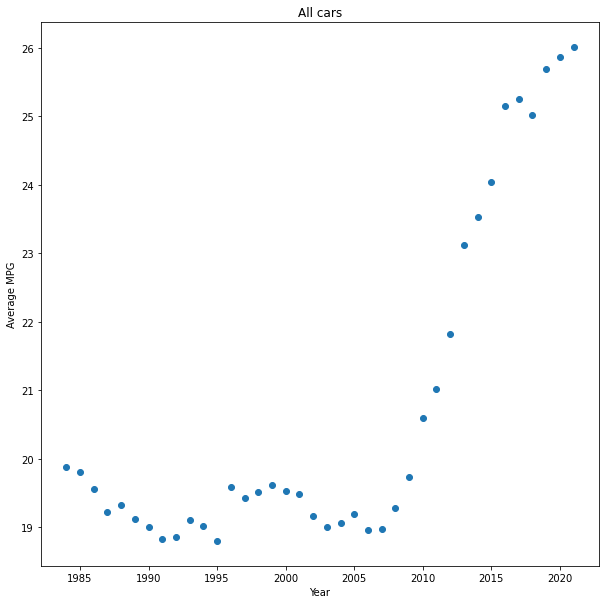

In [98]:
plt.figure(figsize = (10,10))
plt.scatter(averaged.year,averaged.comb08_mean)
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('All cars')

In [99]:
criteria1 = vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','MidGrade Gasoline'])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != 'Hybrid'
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

38294

In [100]:
grouped = vehicles_non_hybrid.groupby('year')
averaged = grouped['comb08'].agg(np.mean)
averaged

year
1984    19.121622
1985    19.394686
1986    19.320457
1987    19.164568
1988    19.367607
1989    19.141964
1990    19.031459
1991    18.838060
1992    18.861566
1993    19.137383
1994    19.092632
1995    18.872591
1996    19.530962
1997    19.368000
1998    19.329545
1999    19.239759
2000    19.169345
2001    19.075058
2002    18.950270
2003    18.761711
2004    18.967339
2005    19.005510
2006    18.786398
2007    18.987512
2008    19.191781
2009    19.738095
2010    20.466736
2011    20.855895
2012    21.461287
2013    22.300434
2014    22.347599
2015    22.469253
2016    22.781664
2017    22.846782
2018    22.885563
2019    22.791031
2020    22.805583
2021    24.802326
Name: comb08, dtype: float64

In [101]:
pd.unique(vehicles_non_hybrid.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

In [102]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [103]:
vehicles_non_hybrid

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,...,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,trany2
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1300,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,...,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,2450,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,...,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-7250,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1000,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,...,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,2450,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,...,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-7250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,A
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,1950,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,...,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,66030,(FFS),-1,1200,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,...,0,14,Subaru,Legacy,N,False,0,90,0,0.0,0.0,0.0,0.0,Automatic 4-spd,24.0000,0.0,37.0000,0.0,Compact Cars,1993,-1000,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,A
42249,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,386.391304,23,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,66030,(FFS),-1,1150,0,Regular,Regular Gasoline,-1,-1,28,0.0,0,0.0,0.0,0.0,...,0,14,Subaru,Legacy,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,25.0000,0.0,39.0000,0.0,Compact Cars,1993,-750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue 

In [0]:
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype(float)

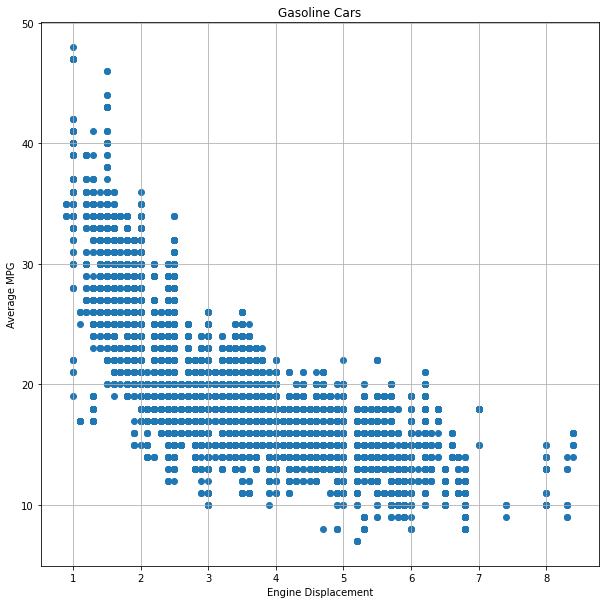

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(vehicles_non_hybrid.displ,vehicles_non_hybrid.comb08)
plt.xlabel('Engine Displacement')
plt.ylabel('Average MPG')
plt.title('Gasoline Cars')
plt.grid()

In [106]:
grouped_by_year = vehicles_non_hybrid.groupby('year')
avg_grouped_by_year = grouped_by_year['displ','comb08'].agg(np.mean)
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year,id_vars = 'year')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0, 0.5, 'Value')

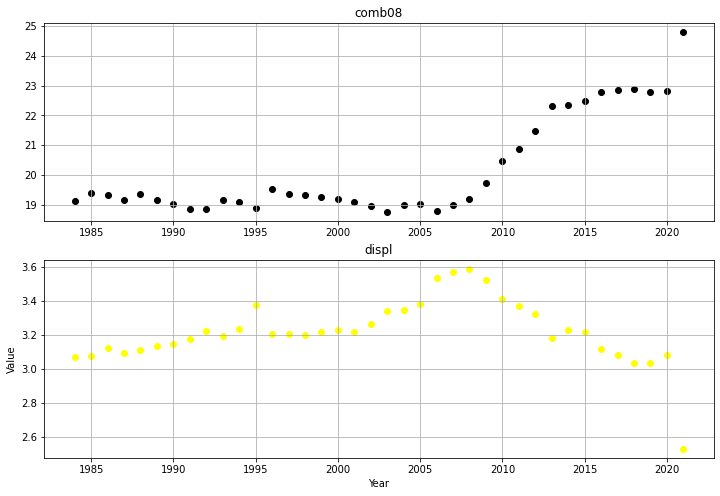

In [107]:
#plt.figure(figsize = (10,10))
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,8))

ax1.scatter(melted_avg_grouped_by_year['year'][melted_avg_grouped_by_year['variable'] == 'comb08'],
            melted_avg_grouped_by_year['value'][melted_avg_grouped_by_year['variable'] == 'comb08'],color = 'black')

ax1.set_title('comb08')
ax1.grid()
ax2.scatter(melted_avg_grouped_by_year['year'][melted_avg_grouped_by_year['variable'] == 'displ'],
            melted_avg_grouped_by_year['value'][melted_avg_grouped_by_year['variable'] == 'displ'],color = 'yellow')

ax2.set_title('displ')
ax2.grid()
plt.xlabel('Year')
plt.ylabel('Value')

In [108]:
pd.unique(vehicles_non_hybrid.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [109]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype(float)
pd.unique(vehicles_non_hybrid.cylinders)

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., 16., nan])

In [0]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[vehicles_non_hybrid['cylinders'] == 4.0]

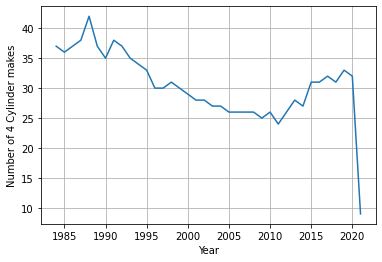

In [111]:
grouped_by_year_4_cylinders = vehicles_non_hybrid_4.groupby('year').make.nunique()
fig = grouped_by_year_4_cylinders.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4 Cylinder makes')
fig.grid()

In [112]:
grouped_by_year_4_cylinders = vehicleas_non_hybrid_4.groupby('year')

unique_makes = []
for name,group in grouped_by_year_4_cylinders:
    unique_makes.append(set(pd.unique(group['make'])))

unique_makes = functools.reduce(set.intersection,unique_makes)
unique_makes

{'Chevrolet', 'Subaru', 'Toyota', 'Volkswagen'}

In [0]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [0]:
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

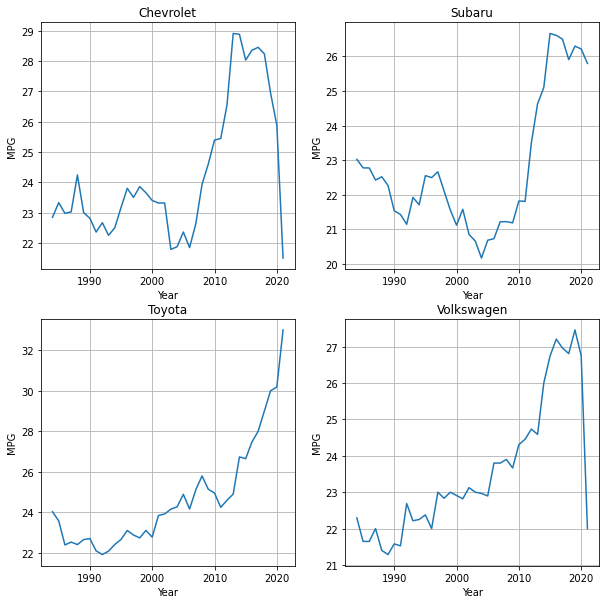

In [115]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (10,10))
ax1.plot(df_common_makes_grouped['year'][df_common_makes_grouped['make'] == 'Chevrolet'],
         df_common_makes_grouped['comb08'][df_common_makes_grouped['make'] == 'Chevrolet'])
ax1.set_title('Chevrolet')
ax1.set_xlabel('Year')
ax1.set_ylabel('MPG')
ax1.grid()

ax2.plot(df_common_makes_grouped['year'][df_common_makes_grouped['make'] == 'Subaru'],
         df_common_makes_grouped['comb08'][df_common_makes_grouped['make'] == 'Subaru'])
ax2.set_title('Subaru')
ax2.set_xlabel('Year')
ax2.set_ylabel('MPG')
ax2.grid()

ax3.plot(df_common_makes_grouped['year'][df_common_makes_grouped['make'] == 'Toyota'],
         df_common_makes_grouped['comb08'][df_common_makes_grouped['make'] == 'Toyota'])
ax3.set_title('Toyota')
ax3.set_xlabel('Year')
ax3.set_ylabel('MPG')
ax3.grid()

ax4.plot(df_common_makes_grouped['year'][df_common_makes_grouped['make'] == 'Volkswagen'],
         df_common_makes_grouped['comb08'][df_common_makes_grouped['make'] == 'Volkswagen'])
ax4.set_title('Volkswagen')
ax4.set_xlabel('Year')
ax4.set_ylabel('MPG')
ax4.grid()